In [16]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

uint8
(450, 700)


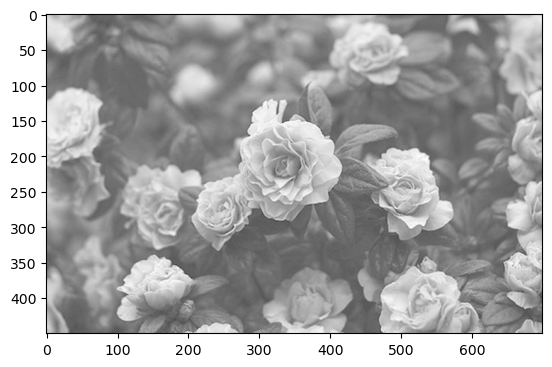

In [18]:
#fName = "tissue.png"
#fName = "micro.png"
fName = "flower.jpg"

I = imageio.imread(fName)
if len(I.shape) > 2:
    img = I[:,:,0]
else:
    img = I
print(img.dtype)
print(img.shape)

plt.imshow(I, cmap='gray', vmin=0, vmax=255)

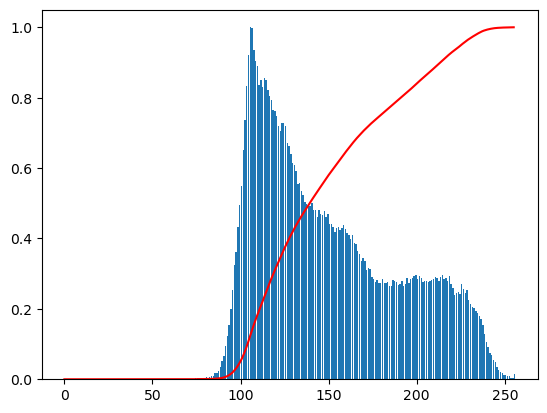

In [20]:
hist, bins = np.histogram(img, bins=256, range=[0,256])
#
# 1. Write your own code to compute the histogram of an image 
# to replace the above line of statement
#
# Initialize
#
# hist = np.zeros(256,)
# ??????
#
# bins = np.arange(257)
#

cdf = np.cumsum(hist)

height, width = img.shape
norm_cdf = cdf / (height * width)

#width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist / hist.max(), align='center')
plt.plot(norm_cdf, color='r')
plt.show()

In [27]:
#cdf_min = cdf / 4 * 3
cdf_min = 0
L = 256
mapping = ((cdf - cdf_min)/(height * width - cdf_min) * (L - 1)).astype("uint8")

# print the mapping
for i in range(L):
    print('Original pixel value', i, '--> new value', mapping[i])

Original pixel value 0 --> new value 0
Original pixel value 1 --> new value 0
Original pixel value 2 --> new value 0
Original pixel value 3 --> new value 0
Original pixel value 4 --> new value 0
Original pixel value 5 --> new value 0
Original pixel value 6 --> new value 0
Original pixel value 7 --> new value 0
Original pixel value 8 --> new value 0
Original pixel value 9 --> new value 0
Original pixel value 10 --> new value 0
Original pixel value 11 --> new value 0
Original pixel value 12 --> new value 0
Original pixel value 13 --> new value 0
Original pixel value 14 --> new value 0
Original pixel value 15 --> new value 0
Original pixel value 16 --> new value 0
Original pixel value 17 --> new value 0
Original pixel value 18 --> new value 0
Original pixel value 19 --> new value 0
Original pixel value 20 --> new value 0
Original pixel value 21 --> new value 0
Original pixel value 22 --> new value 0
Original pixel value 23 --> new value 0
Original pixel value 24 --> new value 0
Original p

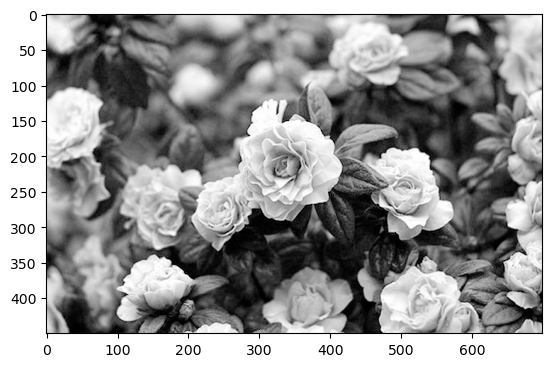

In [25]:
# map the image
img_eq = mapping[img]
plt.imshow(img_eq, cmap='gray')
#plt.axis('off')

imageio.imwrite('flower_equalized.png', img_eq)

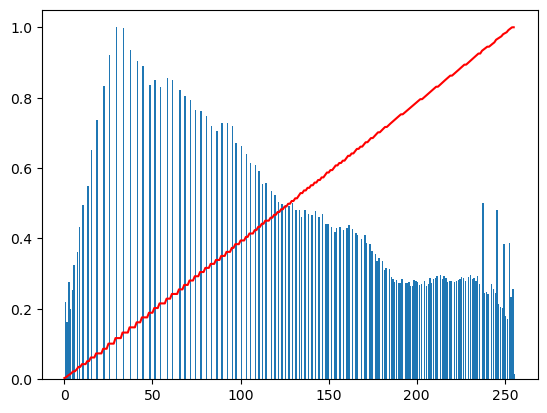

In [28]:
#
# 2. Show the equalized histogram and 
#    Cumulative Distribution Function (CDF)
#
hist, bins = np.histogram(img_eq, bins=256, range=[0,256])

cdf = np.cumsum(hist)
norm_cum_hist = cdf / (height * width)
norm_hist = hist / hist.max()

center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, norm_hist, align='center')
plt.plot(norm_cum_hist, color='r')
plt.show()